<a href="https://colab.research.google.com/github/apashea/Julia-and-VB-in-Colab/blob/main/Julia_in_Colab_RxInfer_for_Message_Passing_and_VB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.8.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.8.2 on the current Colab Runtime...
2024-01-25 14:13:21 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.8/julia-1.8.2-linux-x86_64.tar.gz [135859273/135859273] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.8

Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then
jump to the 'Checking the Installation' section.


# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [1]:
versioninfo()

Julia Version 1.8.2
Commit 36034abf260 (2022-09-29 15:21 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-13.0.1 (ORCJIT, broadwell)
  Threads: 2 on 2 virtual cores
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  JULIA_NUM_THREADS = 2


In [2]:
using BenchmarkTools

M = rand(2^11, 2^11)

@btime $M * $M;

  470.409 ms (2 allocations: 32.00 MiB)


In [3]:
try
    using CUDA
catch
    println("No GPU found.")
else
    run(`nvidia-smi`)
    # Create a new random matrix directly on the GPU:
    M_on_gpu = CUDA.CURAND.rand(2^11, 2^11)
    @btime $M_on_gpu * $M_on_gpu; nothing
end

No GPU found.


# Need Help?

* Learning: https://julialang.org/learning/
* Documentation: https://docs.julialang.org/
* Questions & Discussions:
  * https://discourse.julialang.org/
  * http://julialang.slack.com/
  * https://stackoverflow.com/questions/tagged/julia

If you ever ask for help or file an issue about Julia, you should generally provide the output of `versioninfo()`.

Add new code cells by clicking the `+ Code` button (or _Insert_ > _Code cell_).

Have fun!

<img src="https://raw.githubusercontent.com/JuliaLang/julia-logo-graphics/master/images/julia-logo-mask.png" height="100" />

## Tutorial reference: https://www.youtube.com/watch?v=_vVHWzK9NEI

- See also: Dimtry Bagaev and Bert de Vries, "Reactive Message Passing for Scalable Bayesian Inference", *Hindawi; Scientific Programming* (2023).  https://doi.org/10.1155/2023/6601690

In [4]:
import Pkg; Pkg.add("RxInfer")   # ~3min install

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed SIMDTypes ──────────────────────── v0.1.0
   Installed Calculus ───────────────────────── v0.5.1
   Installed IrrationalConstants ────────────── v0.2.2
   Installed BitTwiddlingConvenienceFunctions ─ v0.1.5
   Installed MatrixFactorizations ───────────── v1.0.0
   Installed Adapt ──────────────────────────── v3.7.2
   Installed DiffRules ──────────────────────── v1.15.1
   Installed OffsetArrays ───────────────────── v1.13.0
   Installed DualNumbers ────────────────────── v0.6.8
   Installed Rmath ──────────────────────────── v0.7.1
   Installed HCubature ──────────────────────── v1.5.1
   Installed FastCholesky ───────────────────── v1.3.0
   Installed LayoutPointers ─────────────────── v0.1.15
   Installed HypergeometricFunctions ────────── v0.3.23
   Installed IntervalSets ───────────────────── v0.7.8
   Installed VectorizationBase ──────────────── v0.21.65
   Installed CpuId ──

In [5]:
import Pkg; Pkg.add("StatsPlots")   # ~5min install

   Resolving package versions...
   Installed JpegTurbo_jll ──────────────── v3.0.1+0
   Installed LERC_jll ───────────────────── v3.0.0+1
   Installed x265_jll ───────────────────── v3.5.0+0
   Installed libfdk_aac_jll ─────────────── v2.0.2+0
   Installed GR_jll ─────────────────────── v0.72.10+0
   Installed LoggingExtras ──────────────── v1.0.3
   Installed FFTW ───────────────────────── v1.8.0
   Installed RelocatableFolders ─────────── v1.0.1
   Installed Opus_jll ───────────────────── v1.3.2+0
   Installed Xorg_xkbcomp_jll ───────────── v1.4.6+0
   Installed Unitful ────────────────────── v1.19.0
   Installed Measures ───────────────────── v0.3.2
   Installed Grisu ──────────────────────── v1.0.2
   Installed ConcurrentUtilities ────────── v2.3.0
   Installed Contour ────────────────────── v0.6.2
   Installed NearestNeighbors ───────────── v0.4.16
   Installed Formatting ─────────────────── v0.4.2
   Installed Xorg_xcb_util_wm_jll ───────── v0.4.1+1
   Installed Xorg_xcb_util_im

In [6]:
# load packages you will be using, set random seed
using RxInfer, StatsPlots
using Random; Random.seed!(1)

TaskLocalRNG()

In [7]:
# generate random data (ex. coin tosses with  outcomes {heads, tails})

true_success_rate = 0.75
distribution = Bernoulli(true_success_rate)
tosses = 10
myobservations = rand(distribution, tosses)
heads = sum(myobservations)
println(heads)

7


In [8]:
# model

# defining a model i.e. Forney-style factor graph (FFG) which will perform message passing

# RxInfer takes in an observation to update the prior to a posterior, then uses latter as the
# new prior when computing the posterior given the next observation


@model function mymodel(tosses)
  # prior
  success_rate ~ Beta(1, 1)   # assign distribution to our prior, here Beta(alpha, beta) = Beta(n_successes, n_failures)
  # likelihood
  observations = datavar(Bool, tosses)   # 'data variables'; allows passing data thru the model, here Boolean values
  for i in 1:tosses    # fill a vector with a likelihood distribution
    observations[i] ~ Bernoulli(success_rate)  # defining process (distribution) from which observations are derived
  end
end

In [12]:
# find posterior distribution

model = mymodel(tosses)
data = (observations = myobservations, )   # set data to pass, in form of tuple with trailing comma
result = inference(model = model, data = data)  # use RxInfer's inference() function

post = result.posteriors[:success_rate]   # store posteriors in a variable
println(post)   # returns an inferred Beta distribution B(8.0, 4.0) as the prior after sequentially showing the model 7 heads and 3 tails
# Notice our distributions for the prior, likelihood, and posterior are Beta, Bernoulli, and Beta, respectively.
# When the prior and posterior distributions are of the same family, these are of
# a 'conjugate distribution' (here, both are Beta distributions), where the prior is a 'conjugate prior'.

post_mean = mean(post)   # store the mean
println(post_mean)    # our updated belief after 10 observations is a success_rate of 2/3
post_std = std(post)  # store the standard deviation
println(post_std)     # our updated belief after 10 observations is a standard deviation of approx. 0.13

Beta{Float64}(α=8.0, β=4.0)
0.6666666666666666
0.1307440900921227


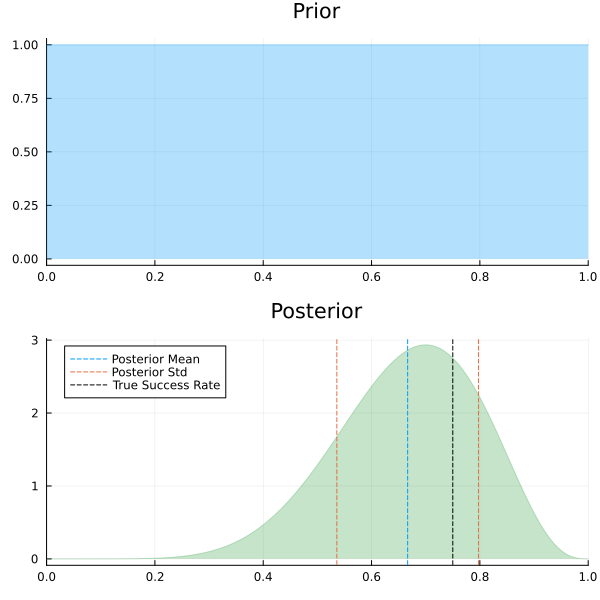

In [17]:
# visualization

p1 = plot(Beta(1, 1);    # prior (our original Beta(1, 1) i.e. a unform, weakly informative prior)
  legend = false,
  xlims = (0, 1),
  title = "Prior",
  fill = true,
  alpha = 0.3
)

# plotting posteriors: we can directly plot the output previous result.posteriors[:success_rate]
p2 = plot(post;
  label = "",
  xlims = (0, 1),
  title = "Posterior",
  fill = true,
  alpha = 0.3,
  color = 3
)

# add vertical line denoting posterior mean found
vline!(p2,
  [post_mean],
  label = "Posterior Mean",
  color = 1,
  linestyle = :dash
)

# compute std above and below posterior mean, add each as vertical lines
std_left = post_mean - post_std
std_right = post_mean + post_std
vline!(p2,
  [std_left, std_right],
  label = "Posterior Std",
  color = 2,
  linestyle = :dash
)
# add true_success_rate as verticle line
vline!(p2,
  [true_success_rate],
  label = "True Success Rate",
  color = :black,
  linestyle = :dash
)
# plot prior plot and posterior plot with vlines together, stacked
plot(p1, p2;
  layout = (2, 1),
  size = (600, 600)
)

# See that after just 10 observations, the true mean is within 1 standard deviation
# around the mean of the posterior distribution

In [ ]:
# Final thoughts:

# Notice how, unlike MCMC, we were able to compute a relatively accurate and conjugate posterior
# distribution without needing a random sampler.

# RxInfer also supports non-conjugate inference. It also is capable of running various
# Bayesian inference algorithms in different parts of the factor graph of a single
# probabilistic model.

# VB

## Tutorial referenced: https://www.youtube.com/watch?v=qnj0PKc734g
____
____

In [ ]:
# generate observations
true_mean = 3.0
true_precision = 5.0    # 1/sigma^2, typically denoted as tau
true_sigma = 1 / sqrt(true_precision)   # std
true_distribution = Normal(true_mean, true_sigma)
n = 100_000    # produce 100000 observations
observations = rand(true_distribution, n)   # random samples from Normal distribution

100000-element Vector{Float64}:
 3.027697163475025
 3.1245068651603756
 2.7335392209183818
 3.020866713374945
 3.4855818483467274
 2.294938732431209
 3.078682756101985
 3.3870100614637537
 1.7521483990530564
 2.1538649194639294
 3.0974383553296065
 2.706649991077448
 3.1196359187656606
 ⋮
 3.256219671340333
 2.865511272641008
 3.195018853884503
 2.815648996383269
 3.4348245931002093
 2.874194232645634
 2.9340230948674932
 2.406729626842361
 2.5373781580477295
 3.3383339253743394
 2.7023855908881953
 2.9673882423239664

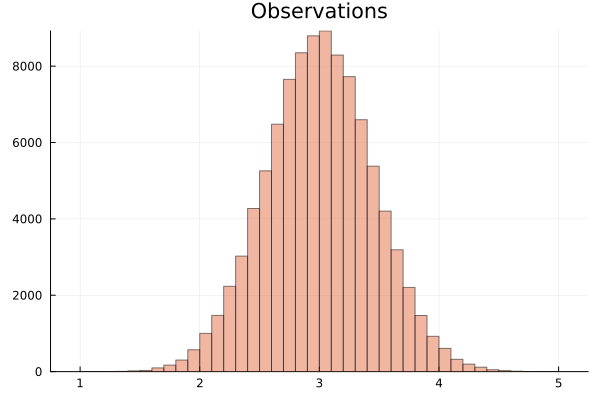

In [ ]:
# visualize observations
p_observations = histogram(observations,
  bins = 1.0:0.1:5.0,
  title = "Observations",
  legend = false,
  color = 2,
  alpha = 0.5
)

In [ ]:
# Model
@model function mymodel(n)
  # prior
  # Following two lines determine the factor graph (model)
  mu ~ NormalMeanPrecision(0.0, 1.0)   # mean parameter (via RxInfer.jl; args=mean,precision)
  tau ~ GammaShapeRate(1.0, 1.0)       # precision parameter (values randomly drawn from gamma dist; args=shape, rate; where rate=1/scale)
  # likelihood
  y = datavar(Float64, n)   # establish data variable (observations) y
  for i in 1:n    # loop to fill a vector of distributions
    y[i] ~ NormalMeanPrecision(mu, tau)   # used because we want to discover mu and tau
  end
end


In [ ]:
# Constraints on model
# Mean-field approximation assumption: parameters work independently
# i.e. assume that [ q(mu, tau) = q(mu)q(tau) ]

# define constraints
constraints = @constraints begin
  q(mu, tau) = q(mu)q(tau)        # where Q is posterior approximation of which q is an element
end

Constraints:
  marginals form:
  messages form:
  factorisation:
    q(mu, tau) = q(mu)q(tau)
Options:
  warn = true


In [ ]:
# Variational Inference

# approximate posteriors
result = inference(
  model = mymodel(n),   # model we defined using @model
  data = (y = observations, ),   # our data (observations); must be a julia tuple incl. ending comma
  constraints = constraints,   # constraints we defined
  initmarginals = (     # initial marginal distributions to initialize inference process
    mu = vague(NormalMeanPrecision),    # vague() function allows initialization at some un-biased starting point
    tau = vague(GammaShapeRate)
  ),
  returnvars = (mu = KeepLast(), tau = KeepLast()),   # only return variables of final iteration
  iterations = 5,   # set n of iterations for inference process
  free_energy = true    # use Bethe Free Energy algorithm as minimization objective
)

# Summary:
#   posteriors are available for mu and tau (per returnvars, only of final iteration)
#   Free energy: BFE values after each iteration; notice convergence after only 3 iterations

Inference results:
  Posteriors       | available for (mu, tau)
  Free Energy:     | Real[1.47348e6, 2.0908e5, 61568.8, 61568.8, 61568.8]


In [ ]:
# view results for mu
mu_posterior = result.posteriors[:mu]
mu_mean = mean(mu_posterior)     # notice true_mean is 3.0
println(mu_mean)   # print variable followed by new line
mu_std = std(mu_posterior)
print(mu_std)

3.0023025736112445
0.0014160852609955302

In [ ]:
# view results for tau
tau_posterior = result.posteriors[:tau]
tau_mean = mean(tau_posterior)
println(tau_mean)    # notice true_precision is 5.0
tau_std = std(tau_posterior)
print(tau_std)

4.986781320253787
0.02230134102973199

In [ ]:
# VI approximation using our model's derived param values

vi_sigma = 1 / sqrt(tau_mean)    # compute std from model's approximated precision
println(vi_sigma)
vi_approximation = Normal(mu_mean, vi_sigma)   # generate Normal distribution using approximated params

0.4478059275659404


Normal{Float64}(μ=3.0023025736112445, σ=0.4478059275659404)

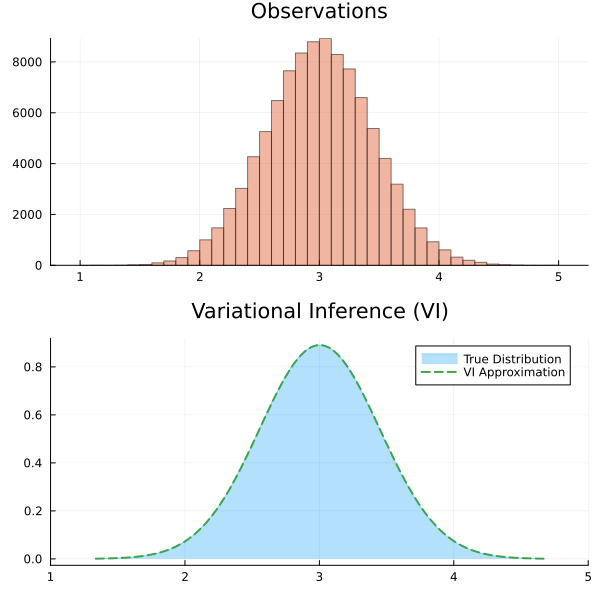

In [ ]:
# true distribution
p_distributions = plot(true_distribution;
  label = "True Distribution",
  title = "Variational Inference (VI)",
  xlims = (1,5),
  color = 1,
  fill = true,
  alpha = 0.3
)

# VI approximation

plot!(p_distributions, vi_approximation;
  label = "VI Approximation",
  color = 3,
  linewidth = 2,
  linestyle = :dash
)

# observations + distributions

plot(p_observations, p_distributions;
  layout = (2,1),
  size = (600, 600)
)

In [ ]:
# Final notes:

# While MCMC will be accurate despite using a much lower (ex. n=100) observations,
# MCMC is inherently much more computationally expensive and inefficient compared to VI.
# In real-world applications, VI may be sufficient despite less accuracy.